In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()   masks Matrix::expand()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ purrr::lift()     masks caret::lift()
✖ tidyr::pack()     masks Matrix::pack()
✖ caret::progress() masks httr::progress()
✖ tidyr::unpack()   masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2b-data"

 # Overfitting and Regularization

In the realm of predictive modeling, the pursuit of creating a model that perfectly fits the training data can inadvertently lead to a phenomenon known as overfitting. Overfitting occurs when a model becomes excessively complex, capturing not only the genuine patterns within the data but also the noise and random fluctuations present in the training set. 

The hyper-adaptation to the training data renders the model less capable of generalizing to new, unseen data, as it effectively memorizes the training examples rather than discerning meaningful relationships. As a result, an overfitted model may exhibit impressive performance on the training data but performs poorly when faced with real-world scenarios. The delicate balance between capturing essential patterns and avoiding the trap of overfitting underscores the importance of techniques like regularization, which aim to ensure model generalization by restraining excessive complexity.

There are three Regularization techniques we will be dealing with, all of which use the idea of penalizing terms to tackle overfitting.

But before we go any further, let's have a look at the data.

**Data Dictionary**

* Product_ID:- Unique identifier for each electronic device. <br>
* Product_Weight:- Weight of the device  <br>
* Energy_Efficiency:- Energy efficiency rating (e.g., "Energy Efficient", "Standard"). <br>
* Visibility_Index:- The % of the total display area of all products in a store allocated to the particular product <br>
* Product_Category:- Category of the electronic device (e.g., "Laptops", "Smartphones"). <br>
* Product_Price:- Price of the device in dollars<br>
* Store_ID:- Unique identifier for the store.<br>
* Store_Established_Year:- Number of years since the store was established.<br>
* Store_Size:- Size classification of the store (e.g., "Small", "Medium").<br>
* Location_Type:- The type of city in which the store is located<br>
* Store_Type:- Type of store (e.g., "Electronics Store Type1").<br>
* Sales_Performance:- Sales of the electronic device in the particular store. This is the outcome variable to be predicted.


## Visualizing the data

Let's visualize this all in the form of a Data Frame

In [4]:
data <- read.csv("/kaggle/input/2b-data/2b-data.csv")
head(data)


,Product_ID,Product_Weight,Energy_Efficiency,Visibility_Index,Product_Category,Product_Price,Store_ID,Store_Established_Year,Store_Size,Location_Type,Store_Type,Sales_Performance
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Energy Efficient,0.01604730,Laptops,249.8092,OUT049,14,Medium,Tier 1,Electronics Store Type1,3735.1380
2,DRC01,5.920,Standard,0.01927822,Smartphones,48.2692,OUT018,4,Medium,Tier 3,Electronics Store Type2,443.4228
3,FDN15,17.500,Energy Efficient,0.01676007,Tablets,141.6180,OUT049,14,Medium,Tier 1,Electronics Store Type1,2097.2700
4,FDX07,19.200,Standard,0.06613203,Monitors,182.0950,OUT010,15,Small,Tier 3,Retail Electronics Store,732.3800
5,NCD19,8.930,Energy Efficient,0.06613203,Refrigerators,53.8614,OUT013,26,High,Tier 3,Electronics Store Type1,994.7052
6,FDP36,10.395,Standard,0.06613203,Microwaves,51.4008,OUT018,4,Medium,Tier 3,Electronics Store Type2,556.6088


## Ridge Regression
Ridge regression is a linear regression technique that incorporates L2 regularization to address issues in predictive modeling (overfitting, multi-colinearity etc).
Linear regression, aims to minimize the sum of squared residuals whereas Ridge regression introduces a penalty term proportional to the square of the magnitude of the coefficients. This penalty, controlled by a hyperparameter (often denoted as lambda), discourages large coefficient values, effectively constraining the model’s complexity, enhancing its stability and generalization performance.


**1)** Perform Ridge Regression on the training data and compare the predictions with the test data to check for the fit of the model. (Hint: Use the glmnet library) (2 marks) <br>
You can split the dataset into 70% train and 30% test.  

In [5]:
if (!require(glmnet)) {
  install.packages("glmnet")
}
library(caret) 
library(glmnet)

train_index <- createDataPartition(data$Sales_Performance, p = 0.7, list = FALSE)

train_data <- data[train_index, ]
test_data <- data[-train_index, ]

# Prepare the matrix format required for glmnet (excluding 'Product_ID' and 'Sales_Performance','Store ID')
x_train <- as.matrix(select(train_data, -Product_ID, -Sales_Performance,-Store_ID))  # Independent variables
y_train <- train_data$Sales_Performance  # Dependent variable

x_test <- as.matrix(select(test_data, -Product_ID, -Sales_Performance,-Store_ID))  # Independent variables
y_test <- test_data$Sales_Performance  # Dependent variable

# Fit the Ridge Regression model (alpha = 0 for Ridge)
ridge_model <- glmnet(x_train, y_train, alpha = 0)

# Make predictions on the test set
ridge_prediction <- predict(ridge_model, s = 0.01, newx = x_test)  # s is the lambda value

# Compare predictions with the actual values
comparison <- data.frame(Actual = y_test, Predicted = ridge_prediction)

# Print the comparison
print(head(comparison))

# Optionally calculate performance metrics
mse <- mean((ridge_prediction - y_test)^2)
cat("Mean Squared Error (MSE):", mse, "\n")

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


      Actual       s1
3  2097.2700 2400.377
5   994.7052 1066.527
7   343.5528 1345.555
8  4022.7636 1599.378
9  1076.5986 1707.565
10 4710.5350 2626.028
Mean Squared Error (MSE): 1863782 


**2)** Is it possible for you to somehow conduct hyperparameter tuning and find the best lambda value for the Ridge Regression model? (Hint: use the cv.glmnet function)   (1 mark)

In [6]:
# Perform Ridge Regression with cross-validation to find the best lambda
cv_ridge_model <- cv.glmnet(x_train, y_train, alpha = 0)

# Get the best lambda value
best_lambda <- cv_ridge_model$lambda.min
print(paste("Best lambda value:", best_lambda))

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

[1] "Best lambda value: 97.0342477398582"


**3)** With the optimal lambda, build the model again and print the coefficients of the various dependent variables. What can you comment about the relationship between lambda and the strength of regularization?        (2 marks)


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


[1] "Mean Squared Error: 1863782.20337683"


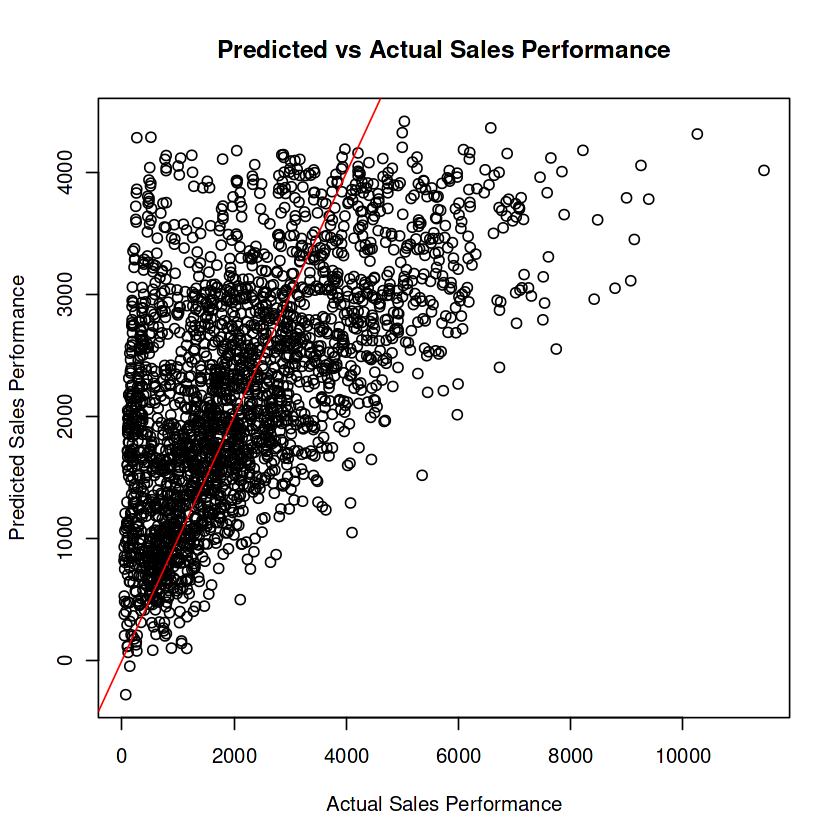

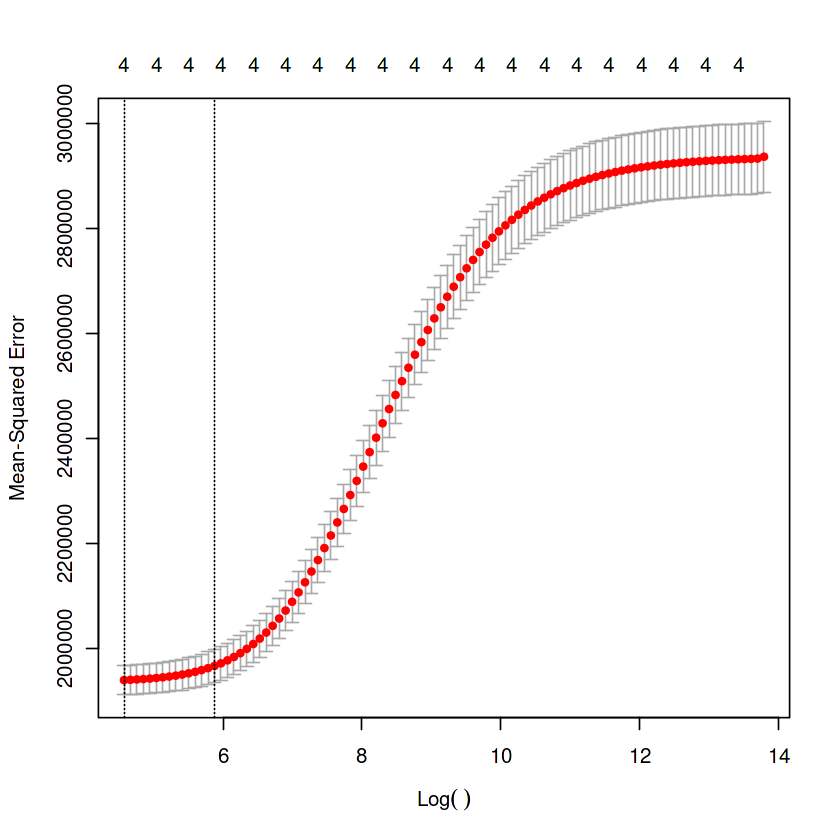

In [7]:
# Train the final Ridge Regression model using the best lambda
ridge_model <- glmnet(x_train, y_train, alpha = 0, lambda = best_lambda)

# Make predictions on the test data
predictions <- predict(ridge_model, s = best_lambda, newx = x_test)

# Compare predictions with actual values using Mean Squared Error (MSE)
mse <- mean((y_test - predictions)^2)
print(paste("Mean Squared Error:", mse))

# Plot predicted vs actual values
plot(y_test, predictions, main = "Predicted vs Actual Sales Performance",
     xlab = "Actual Sales Performance", ylab = "Predicted Sales Performance")
abline(0, 1, col = "red")

# Optionally, plot the cross-validation curve
plot(cv_ridge_model)


Some variables have non zero coefficients, which mean they are relatively important for predicting Sales_Performance. The features that were shrunk to near zero values have less significance.

## Lasso Regression

Lasso regression is similar to Ridge Regression except that instead of L2 regularization, it employs L1 regularization to address the very same issues that Ridge Regression addresses. 

There are however, a couple of differences between the two. The first and most obvious being that since Lasso Regression implements L1 regularization, the penalty term in this case is proportional to the absolute value of the coefficient. 

Another point to note is that unlike its Ridge counterpart, Lasso Regression can push some coefficients to exactly 0. This effectively drops the feature from the predictive model (Similar to how we drop values through visual analysis). Lasso Regression can thus be used effectively for Feature Selection as well.

**1)** Write code to build a Lasso Regression model similar to how you built the Ridge Regression model. This time incorporate hyperparameter tuning right away. So first print the optimal lambda value.                  (2 marks)

In [8]:
library(glmnet)
  library(caret)
  library(dplyr)

  set.seed(456)
  train_index <- createDataPartition(data$Sales_Performance, p = 0.7, list = FALSE)

  train_data <- data[train_index, ]
  test_data <- data[-train_index, ]

  x_train <- as.matrix(select(train_data, -Product_ID, -Sales_Performance,-Store_ID))
  y_train <- train_data$Sales_Performance

  x_test <- as.matrix(select(test_data, -Product_ID, -Sales_Performance,-Store_ID))
  y_test <- test_data$Sales_Performance

  # Perform cross-validation to find the best lambda for Lasso Regression
  set.seed(456)
  cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)  # alpha = 1 for Lasso

  # Best lambda value
  best_lambda_lasso <- cv_lasso$lambda.min
  cat("Best lambda value for Lasso: ", best_lambda_lasso, "\n")

  # Fit the final Lasso Regression model using the best lambda
  final_lasso_model <- glmnet(x_train, y_train, alpha = 1, lambda = best_lambda_lasso)

  # Make predictions on the test set
  lasso_pred <- predict(final_lasso_model, newx = x_test)

  # Compare predictions with the actual values
  comparison_lasso <- data.frame(Actual = y_test, Predicted = lasso_pred)
#   print(comparison_lasso)

  # Calculate performance metrics
  mse_lasso <- mean((lasso_pred - y_test)^2)
  cat("Mean Squared Error (MSE) for Lasso: ", mse_lasso, "\n")



Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Best lambda value for Lasso:  8.490407 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


Mean Squared Error (MSE) for Lasso:  1817107 


**2)** Display the coefficients of all the variables. Do you notice some variables being dropped out? Which ones are they?   (1 mark)

In [9]:
best_lambda_lasso <- cv_lasso$lambda.min
  cat("Best lambda value for Lasso: ", best_lambda_lasso, "\n")

  final_lasso_model <- glmnet(x_train, y_train, alpha = 1, lambda = best_lambda_lasso)

  lasso_coefficients <- as.matrix(coef(final_lasso_model))  # Convert to matrix
  print(lasso_coefficients)

  # Identify dropped variables (coefficients set to zero)
  dropped_vars <- rownames(lasso_coefficients)[lasso_coefficients == 0]
  cat("Dropped variables (coefficients = 0):\n")
  print(dropped_vars)

Best lambda value for Lasso:  8.490407 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


                                s0
(Intercept)              124.96730
Product_Weight             0.00000
Energy_Efficiency          0.00000
Visibility_Index       -4296.50770
Product_Category           0.00000
Product_Price             15.56719
Store_Established_Year    11.69926
Store_Size                 0.00000
Location_Type              0.00000
Store_Type                 0.00000
Dropped variables (coefficients = 0):
[1] "Product_Weight"    "Energy_Efficiency" "Product_Category" 
[4] "Store_Size"        "Location_Type"     "Store_Type"       


## Elastic Net Regression

Elastic Net regression, an advanced form of linear regression, combines the benefits of L1 (Lasso) and L2 (Ridge) regularization methods. By integrating both penalty terms, Elastic Net overcomes the limitations of each, offering resilience against multicollinearity, aiding feature selection, and preventing overfitting. 

This approach makes Elastic Net a very versatile approach for achieving accurate and efficient models by finding a middle ground between dropping parameters and retaining important predictors. 

**1)** Build your Elastic Net Regression model incorporating all the steps we previously followed for ridge and lasso regression. (Play around with the alpha value and find out how it affects the model)            (2 marks)


In [10]:
suppressWarnings({library(glmnet)
  library(caret)
  library(dplyr)

  set.seed(123)
  train_index <- createDataPartition(data$Sales_Performance, p = 0.7, list = FALSE)

  train_data <- data[train_index, ]
  test_data <- data[-train_index, ]

  x_train <- as.matrix(select(train_data, -Product_ID, -Sales_Performance))
  y_train <- train_data$Sales_Performance

  x_test <- as.matrix(select(test_data, -Product_ID, -Sales_Performance,))

  y_test <- test_data$Sales_Performance

  # Test different alpha values to find the best one
  alpha_values <- seq(0, 1, by = 0.1)
  results <- data.frame(alpha = numeric(), lambda = numeric(), mse = numeric())

  for (alpha in alpha_values) {
    set.seed(123)
    cv_en <- cv.glmnet(x_train, y_train, alpha = alpha)
    best_lambda <- cv_en$lambda.min
    en_model <- glmnet(x_train, y_train, alpha = alpha, lambda = best_lambda)

    en_pred <- predict(en_model, newx = x_test)
    mse <- mean((en_pred - y_test)^2)

    results <- rbind(results, data.frame(alpha = alpha, lambda = best_lambda, mse = mse))
  }

  # Find the best alpha based on MSE
  best_result <- results[which.min(results$mse), ]
  best_alpha <- best_result$alpha
  best_lambda <- best_result$lambda
  cat("Best alpha value for Elastic Net: ", best_alpha, "\n")
  cat("Best lambda value for Elastic Net: ", best_lambda, "\n")
  cat("Mean Squared Error (MSE) for Elastic Net: ", best_result$mse, "\n")

  # Fit the final Elastic Net model using the best alpha and lambda
  final_en_model <- glmnet(x_train, y_train, alpha = best_alpha, lambda = best_lambda)

  # Display the coefficients of the final model
  en_coefficients <- as.matrix(coef(final_en_model))
  print(en_coefficients)

  # Identify dropped variables (coefficients set to zero)
  dropped_vars <- rownames(en_coefficients)[en_coefficients == 0]
  cat("Dropped variables (coefficients = 0):\n")
  print(dropped_vars)})

Best alpha value for Elastic Net:  0.1 
Best lambda value for Elastic Net:  11.82171 
Mean Squared Error (MSE) for Elastic Net:  1918551 
                                  s0
(Intercept)              133.7831571
Product_Weight            -0.0908876
Energy_Efficiency          0.0000000
Visibility_Index       -4395.5493741
Product_Category           0.0000000
Product_Price             15.2603313
Store_ID                   0.0000000
Store_Established_Year    12.9062597
Store_Size                 0.0000000
Location_Type              0.0000000
Store_Type                 0.0000000
Dropped variables (coefficients = 0):
[1] "Energy_Efficiency" "Product_Category"  "Store_ID"         
[4] "Store_Size"        "Location_Type"     "Store_Type"       


Identify and list the variables that have been dropped in the Elastic Net model. How does this compare to the variables dropped in the Lasso model? <br>
What does that tell you about the number of hyperparameters in Elastic Net Regression compared to the other two models?

From the output we can see that Energy_Efficiency, Product_Category, Store_ID, Store_Size, Location_Type and Store_Type have been dropped. The variables dropped by Elastic Net (Energy_Efficiency, Product_Category, Store_ID, Store_Size, Location_Type, Store_Type) are the same as those dropped in the Lasso model. Since Elastic Net uses a mix of L1 (Lasso) and L2 (Ridge) regularization, it retains the Lasso-like feature selection behavior when alpha is closer to 1. The similarities in dropped variables suggest that the Elastic Net model with the best alpha value behaves similarly to Lasso in terms of feature selection.